In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import ensemble
import xgboost as xgb
from numpy import loadtxt
from keras.utils.vis_utils import plot_model
import pydot

Using TensorFlow backend.


In [2]:
def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [3]:
all_datasets = 'ALL_CSV\\Dataset\\'
df = pd.read_csv(all_datasets+ 'qsort_physical.csv')

In [4]:
df.head()

,ps,num-cpus,runtime,power,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,...,l2_size,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpu,bus_speed
0,10000,1,1417.9634,27.625819,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
1,10000,10,3433.4365,75.175848,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
2,10000,11,5709.7232,70.396933,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
3,10000,12,13794.7644,66.084130,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096
4,10000,2,2017.1813,22.357435,InteCorei78700_DDR42666_16GB,3.168,X86_64,8,64,1,...,256,16,64,6,12288,16,DDR4,2666,6,4096


In [5]:
df.columns, len(df.columns)

(Index(['ps', 'num-cpus', 'runtime', 'power', 'arch', 'cpu-clock', 'isa',
        'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size',
        'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads', 'l2_size',
        'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads', 'l3_size',
        'mem-size', 'mem-type', 'mem_clock', 'num-cpu', 'bus_speed'],
       dtype='object'), 24)

In [6]:
len(df)

672

In [7]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [8]:
encoded_data_frame.head()

,ps,num-cpus,runtime,power,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,...,l3_assoc,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type_1,mem-type_2,mem_clock,num-cpu,bus_speed
0,10000,1,1417.9634,27.625819,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
1,10000,10,3433.4365,75.175848,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
2,10000,11,5709.7232,70.396933,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
3,10000,12,13794.7644,66.084130,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096
4,10000,2,2017.1813,22.357435,InteCorei78700_DDR42666_16GB,3.168,1,8,64,1,...,16,64,6,12288,16,1,0,2666,6,4096


In [9]:
encoded_data_frame.columns

Index(['ps', 'num-cpus', 'runtime', 'power', 'arch', 'cpu-clock', 'isa_1',
       'l1d_assoc', 'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size',
       'l2_assoc', 'l2_cache_lines', 'l2_shared_by_threads', 'l2_size',
       'l3_assoc', 'l3_cache_lines', 'l3_shared_by_threads', 'l3_size',
       'mem-size', 'mem-type_1', 'mem-type_2', 'mem_clock', 'num-cpu',
       'bus_speed'],
      dtype='object')

In [10]:
total_data = encoded_data_frame.drop(columns = ['arch'])
total_data.columns

Index(['ps', 'num-cpus', 'runtime', 'power', 'cpu-clock', 'isa_1', 'l1d_assoc',
       'l1d_cache_lines', 'l1d_shared_by_threads', 'l1d_size', 'l2_assoc',
       'l2_cache_lines', 'l2_shared_by_threads', 'l2_size', 'l3_assoc',
       'l3_cache_lines', 'l3_shared_by_threads', 'l3_size', 'mem-size',
       'mem-type_1', 'mem-type_2', 'mem_clock', 'num-cpu', 'bus_speed'],
      dtype='object')

In [11]:
total_data = total_data.fillna(0)

In [12]:
X = total_data.drop(columns = ['runtime', 'power']).to_numpy()
Y = total_data[['runtime', 'power']].to_numpy()

In [13]:
X.shape, Y.shape

((672, 22), (672, 2))

In [14]:
# Separating Physical data to 10% and 90%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(537, 22) (537, 2) (135, 22) (135, 2)


In [15]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)
scaler_y = StandardScaler()
Y_train = scaler_y.fit_transform(Y_train)
Y_test = scaler_y.fit_transform(Y_test)

In [26]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                1472      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 130       
Total params: 9,922
Trainable params: 9,922
Non-trainable params: 0
_________________________________________________________________
Model : DNN 2 None


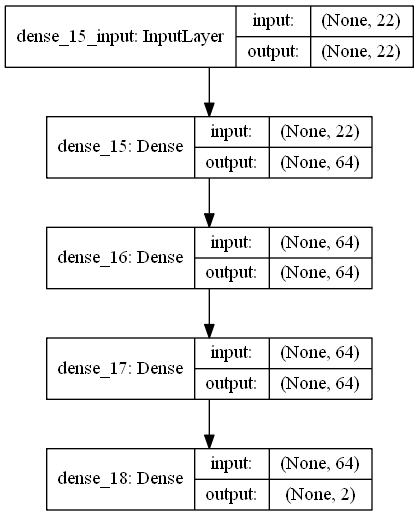

In [27]:
dnn = Sequential()
dnn.add(Dense(64, input_dim = 22, activation='relu'))
# dnn.add(Dropout(0.1))
dnn.add(Dense(64, activation='relu'))
# dnn.add(Dropout(0.1))
# dnn.add(Dense(64, activation='relu'))
# dnn.add(Dropout(0.1))
dnn.add(Dense(64, activation='relu'))
# dnn.add(Dropout(0.1))
dnn.add(Dense(2, activation='linear'))
print('Model : DNN 2', dnn.summary())
plot_model(dnn, to_file = 'dnn.png', show_shapes = True)

In [28]:
model_orig = dnn
model_orig.compile(loss='mae', optimizer='adam', metrics=['mae'])
model_orig.fit(X_train, Y_train, epochs = 100, batch_size = 5, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.3742 - mae: 0.3742
Epoch 2/100
 - 0s - loss: 0.2345 - mae: 0.2345
Epoch 3/100
 - 0s - loss: 0.2122 - mae: 0.2122
Epoch 4/100
 - 0s - loss: 0.1943 - mae: 0.1943
Epoch 5/100
 - 0s - loss: 0.1949 - mae: 0.1949
Epoch 6/100
 - 0s - loss: 0.1985 - mae: 0.1985
Epoch 7/100
 - 0s - loss: 0.1853 - mae: 0.1853
Epoch 8/100
 - 0s - loss: 0.1831 - mae: 0.1831
Epoch 9/100
 - 0s - loss: 0.1723 - mae: 0.1723
Epoch 10/100
 - 0s - loss: 0.1792 - mae: 0.1792
Epoch 11/100
 - 0s - loss: 0.1782 - mae: 0.1782
Epoch 12/100
 - 0s - loss: 0.1734 - mae: 0.1734
Epoch 13/100
 - 0s - loss: 0.1723 - mae: 0.1723
Epoch 14/100
 - 0s - loss: 0.1727 - mae: 0.1727
Epoch 15/100
 - 0s - loss: 0.1735 - mae: 0.1735
Epoch 16/100
 - 0s - loss: 0.1700 - mae: 0.1700
Epoch 17/100
 - 0s - loss: 0.1681 - mae: 0.1681
Epoch 18/100
 - 0s - loss: 0.1609 - mae: 0.1609
Epoch 19/100
 - 0s - loss: 0.1661 - mae: 0.1661
Epoch 20/100
 - 0s - loss: 0.1645 - mae: 0.1645
Epoch 21/100
 - 0s - loss: 0.1612 - mae: 0.1612
E

MSE: 
 1800597.5595784641

R2: 
 0.8847093924603681

MAPE: 
 0.20481577096310036 0.1394045137565176


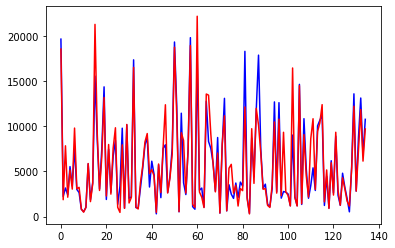

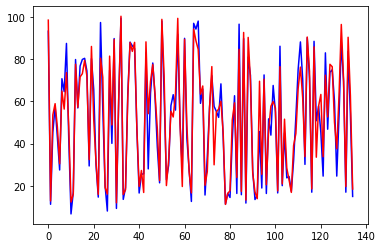

In [29]:
r2_scores = []
mse_scores = []
mape_power_scores = []
mape_runtime_scores= []
Y_pred = model_orig.predict(X_test)
temp = Y_test
temp = scaler_y.inverse_transform(temp)
Y_pred = scaler_y.inverse_transform(Y_pred)

plt.figure()
plt.plot(temp[:,0], 'b')
plt.plot(Y_pred[:,0], 'r')
plt.figure()
plt.plot(temp[:,1], 'b')
plt.plot(Y_pred[:,1], 'r')

r2_scores = (r2_score(temp, Y_pred))
mse_scores = (mean_squared_error(temp, Y_pred))
mape_runtime_scores = (absolute_percentage_error(temp[:,0], Y_pred[:,0]))
mape_power_scores = (absolute_percentage_error(temp[:,1], Y_pred[:,1]))

print('MSE: \n', mse_scores)
print('\nR2: \n', r2_scores)
print('\nMAPE: \n', mape_runtime_scores, mape_power_scores)